In [16]:
import numpy as np 
import keras 

In [17]:
from keras.preprocessing.image import ImageDataGenerator

In [18]:
train_path="C:/Users/91944/Desktop/Training_Set"
test_path ="C:/Users/91944/Desktop/Test_Set"

In [19]:
train_data= ImageDataGenerator(rescale=1./255)
test_data=ImageDataGenerator(rescale=1./255)

In [20]:
X= train_data.flow_from_directory(train_path,target_size=(150,150),batch_size=32,class_mode="binary")
y= test_data.flow_from_directory(test_path,target_size=(150,150),batch_size=32,class_mode="binary")

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [21]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense

In [22]:
model=Sequential()

In [24]:
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(150,150,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())

In [25]:
model.add(Dense(units=70,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [26]:
model.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])

In [27]:
model.fit(X,validation_data=y,epochs=2,steps_per_epoch=15)

Epoch 1/2
15/15 [==============================] - 95s 6s/step - loss: 1.3352 - accuracy: 0.4979 - val_loss: 0.6960 - val_accuracy: 0.5000
Epoch 2/2
15/15 [==============================] - 75s 5s/step - loss: 0.6880 - accuracy: 0.5604 - val_loss: 0.6744 - val_accuracy: 0.5560


In [ ]:
model.save('catvsdogs.keras')

In [28]:
from keras.models import load_model
import numpy as np

In [29]:
model=load_model('catvsdogs.keras')

In [30]:
from keras.utils import img_to_array,load_img

In [35]:
img= load_img("C:/Users/91944/Desktop/download (1).jpeg",target_size=(150,150))

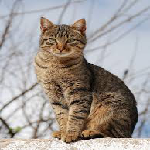

In [36]:
img

In [37]:
img=img_to_array(img)

In [38]:
img

array([[[150., 161., 179.],
        [158., 169., 187.],
        [172., 183., 201.],
        ...,
        [184., 192., 213.],
        [179., 192., 209.],
        [179., 192., 209.]],

       [[154., 165., 183.],
        [162., 173., 191.],
        [174., 185., 203.],
        ...,
        [184., 192., 211.],
        [179., 192., 208.],
        [179., 192., 208.]],

       [[162., 173., 191.],
        [169., 180., 198.],
        [179., 190., 208.],
        ...,
        [184., 192., 211.],
        [180., 192., 208.],
        [180., 192., 208.]],

       ...,

       [[200., 186., 173.],
        [209., 195., 182.],
        [208., 192., 177.],
        ...,
        [236., 232., 229.],
        [240., 241., 233.],
        [246., 247., 239.]],

       [[188., 178., 169.],
        [236., 227., 220.],
        [249., 240., 233.],
        ...,
        [241., 232., 227.],
        [244., 243., 241.],
        [244., 243., 241.]],

       [[191., 181., 172.],
        [206., 197., 190.],
        [192., 1

In [39]:
img_size=np.expand_dims(img,axis=0)

In [40]:
img_size.shape

(1, 150, 150, 3)

In [42]:
pred=model.predict(img_size)

1/1 [==============================] - 0s 30ms/step


In [44]:
pred=np.argmax(pred)

In [45]:
pred

0